In [ ]:
import moda
from moda import QEHCParameters, QEHCSolver
import sys
import faulthandler
faulthandler.enable()

params = QEHCParameters()
solver = QEHCSolver()
    
ds1 = moda.DataSet('linear_d8n400_7')
res = solver.Solve(ds1,params)
print(res)

In [ ]:
import numpy as np
data = np.array([[2.0,3.0],[3.0,4.0]])

ds2 = moda.DataSet(data)

print(ds2)



[[0.23284221 0.32681638]
 [0.22963942 0.32911968]
 [0.05097348 0.71530732]
 [0.10222314 0.38812172]
 [0.05777225 0.49567605]
 [0.09436084 0.47497879]
 [0.08823659 0.48089614]
 [0.02708682 1.        ]
 [0.26223131 0.26335746]
 [0.31101276 0.15427988]
 [0.30882459 0.17954305]
 [0.33337283 0.13855275]
 [0.43073651 0.07245694]
 [0.4598063  0.06050883]
 [0.90403955 0.03170205]
 [0.69166411 0.05259329]]
(-0.8769527077674866, 0.0, 7, -1, 21866)
[[0.23284221 0.32681638]
 [0.22963942 0.32911968]
 [0.05097348 0.71530732]
 [0.10222314 0.38812172]
 [0.05777225 0.49567605]
 [0.09436084 0.47497879]
 [0.08823659 0.48089614]
 [0.26223131 0.26335746]
 [0.31101276 0.15427988]
 [0.30882459 0.17954305]
 [0.33337283 0.13855275]
 [0.43073651 0.07245694]
 [0.4598063  0.06050883]
 [0.90403955 0.03170205]
 [0.69166411 0.05259329]]
(-0.61800616979599, 0.0, 13, -1, 14794)
[[0.23284221 0.32681638]
 [0.22963942 0.32911968]
 [0.05097348 0.71530732]
 [0.10222314 0.38812172]
 [0.05777225 0.49567605]
 [0.09436084 0.47

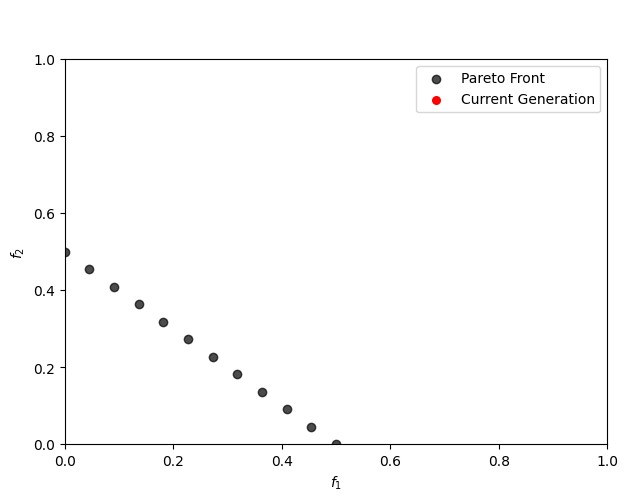

In [ ]:
from pymoo.algorithms.moo.moda.sms_moda import SMSEMOA_MODA
from pymoo.algorithms.moo.sms import SMSEMOA
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from pymoo.util.reference_direction import UniformReferenceDirectionFactory
from pymoo.optimize import minimize
from pymoo.problems import get_problem
import time
# 1. Setup Problem and Run Optimization once
n_obj = 2
problem = get_problem("dtlz1",6,n_obj=n_obj)
algorithm = SMSEMOA_MODA()
pf = problem.pareto_front(ref_dirs = UniformReferenceDirectionFactory(n_obj, n_points=12  ).do())

start = time.time()
res = minimize(problem, algorithm, ('n_gen', 50), seed=1, save_history=True)
print(f'Elsapsed: {time.time() - start}')
# 2. Setup the Figure for Animation
fig = plt.figure(figsize=(7, 5))
# ax1 = fig.add_subplot(121, projection='3d')
ax1 = fig.add_subplot(111)
# ax2 = fig.add_subplot(122, projection='3d')
ax1.set_xlim(0, 1) # Adjust based on expected DTLZ1 convergence
ax1.set_ylim(0, 1)
ax1.scatter(pf[:, 0], pf[:, 1], color="black", alpha=0.7, label="Pareto Front")
# ax1.scatter(pf[:, 0], pf[:, 1], pf[:, 2], color="black", alpha=0.7, label="Pareto Front")
# ax2.scatter(pf[:, 3], pf[:, 4], pf[:, 5], color="black", alpha=0.7, label="Pareto Front")
scatter1 = ax1.scatter([], [], color="red", s=30, label="Current Generation")
# scatter2 = ax2.scatter([], [], [], color="red", s=30, label="Current Generation")

title = fig.suptitle("SMS-EMOA (pymoo)", fontsize=14)
ax1.set_xlabel("$f_1$")
# ax2.set_xlabel("$f_1$")
ax1.set_ylabel("$f_2$")
# ax2.set_ylabel("$f_2$")
ax1.legend()
# ax2.legend()

# 3. Define the Update Function
def update_13(frame):
    # print(frame)
    # Get the population objectives at this generation
    F = res.history[frame].opt.get("F")
    scatter1.set_offsets(F[:, :2])
    # scatter1._offsets3d = (F[:, 0], F[:, 1], F[:, 2])
    # scatter2._offsets3d = (F[:, 3], F[:, 4], F[:, 5])
    title.set_text(f"SMS-EMOA (pymoo) – Generation {frame + 1}")
    return [scatter1, title]



# 4. Create and Show Animation
# interval is delay between frames in milliseconds
ani = FuncAnimation(fig, update_13, frames=len(res.history), interval=50, blit=True)
ani.save('smsemoa_moda_2d.mp4')

plt.show()

In [ ]:
import numpy as np
a = np.array([[1,2],[3,4],[5,6]])
np.delete(a, 1, axis=0)

In [ ]:
from pymoo.algorithms.moo.moda.sms_moda import SMSEMOA_MODA
from pymoo.algorithms.moo.sms import SMSEMOA
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from pymoo.util.reference_direction import UniformReferenceDirectionFactory
from pymoo.optimize import minimize
from pymoo.problems import get_problem
import time
# 1. Setup Problem and Run Optimization once
n_obj = 6
problem = get_problem("dtlz1",6,n_obj=n_obj)
algorithm = SMSEMOA_MODA()
pf = problem.pareto_front(ref_dirs = UniformReferenceDirectionFactory(n_obj, n_points=126  ).do())

start = time.time()
res = minimize(problem, algorithm, ('n_gen', 100), seed=1, save_history=True)
print(f'Elsapsed: {time.time() - start}')
# 2. Setup the Figure for Animation
fig = plt.figure(figsize=(7, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

ax1.scatter(pf[:, 0], pf[:, 1], pf[:, 2], color="black", alpha=0.7, label="Pareto Front")
ax2.scatter(pf[:, 3], pf[:, 4], pf[:, 5], color="black", alpha=0.7, label="Pareto Front")
scatter1 = ax1.scatter([], [], [], color="red", s=30, label="Current Generation")
scatter2 = ax2.scatter([], [], [], color="red", s=30, label="Current Generation")

title = fig.suptitle("SMS-EMOA (MODA)", fontsize=14)
ax1.set_xlabel("$f_1$")
ax2.set_xlabel("$f_1$")
ax1.set_ylabel("$f_2$")
ax2.set_ylabel("$f_2$")
ax1.legend()
ax2.legend()

# 3. Define the Update Function
def update_13(frame):
    print(frame)
    # Get the population objectives at this generation
    F = res.history[frame].opt.get("F")
    scatter1._offsets3d = (F[:, 0], F[:, 1], F[:, 2])
    scatter2._offsets3d = (F[:, 3], F[:, 4], F[:, 5])
    title.set_text(f"SMS-EMOA (MODA) – Generation {frame + 1}")
    return scatter1,scatter2



# 4. Create and Show Animation
# interval is delay between frames in milliseconds
ani = FuncAnimation(fig, update_13, frames=len(res.history), interval=50, blit=True)
ani.save('smsemoa_moda.mp4')

plt.show()

In [ ]:
import numpy as np

from pymoo.problems import get_problem
from pymoo.visualization.fitness_landscape import FitnessLandscape

problem = get_problem("ackley", n_var=2, a=20, b=1/5, c=2 * np.pi)

FitnessLandscape(problem, angle=(45, 45), _type="surface").show()

In [ ]:
from pymoo.algorithms.moo.moda.sms_moda import SMSEMOA_MODA
from pymoo.algorithms.moo.sms import SMSEMOA
from pymoo.algorithms.moo.sms_exact import SMSEMOA_EXACT
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from pymoo.util.reference_direction import UniformReferenceDirectionFactory
from pymoo.optimize import minimize
from pymoo.problems import get_problem
import time
from pymoo.indicators.igd import IGD
from pymoo.util.normalization import normalize
import numpy as np


algos = ['wfg1','wfg2','dtlz1','dtlz2','dtlz4']
no_obs = [10,10,4,4,4]
for i,algo in enumerate(algos):
    for j in range(10):
        n_obj = 5
        problem = get_problem(algo,no_obs[i],n_obj=n_obj)
        pf = problem.pareto_front(ref_dirs = UniformReferenceDirectionFactory(n_obj, n_points=126     ).do())
        algorithm = SMSEMOA_MODA()
        start = time.time()
        res_moda = minimize(problem, algorithm, ('n_gen', 25), seed=j, save_history=True)
        moda_time = time.time() - start
        algorithm = SMSEMOA()
        start = time.time()
        res_approx_moo = minimize(problem, algorithm, ('n_gen', 25), seed=j, save_history=True)
        moo_time = time.time() - start
        algorithm = SMSEMOA_EXACT()
        start = time.time()
        res_exact_moo = minimize(problem, algorithm, ('n_gen', 25), seed=j, save_history=True)
        moo_exact_time = time.time() - start
        
        
        F_all = np.vstack([
            res_moda.F,
            res_approx_moo.F,
            res_exact_moo.F,
            pf
        ])

        F_norm = normalize(F_all)

        n1 = len(res_moda.F)
        n2 = len(res_approx_moo.F)
        n3 = len(res_exact_moo.F)

        F_moda_n = F_norm[:n1]
        F_approx_n = F_norm[n1:n1+n2]
        F_exact_n = F_norm[n1+n2:n1+n2+n3]
        pf_n = F_norm[n1+n2+n3:]

        igd = IGD(pf_n)
        igd_moda = igd(F_moda_n)
        igd_approx = igd(F_approx_n)
        igd_exact = igd(F_exact_n)
        print(f'{moo_exact_time}\t{igd_exact}\t{moo_time}\t{igd_approx}\t{moda_time}\t{igd_moda}\r\n',end = '')